In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [42]:
data=pd.read_csv("Telco-Customer-Churn.csv")
data.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [41]:
# raplace blanks as 0 beacuase tenure is 0 and total charges is 0

In [6]:
data.info()
data["TotalCharges"]=data["TotalCharges"].replace(" ","0")
data["TotalCharges"]=data["TotalCharges"].astype("float")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [24]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [7]:
#data.duplicated().sum()
data["customerID"].duplicated().sum()

np.int64(0)

In [8]:
def conv(value):
    if value == 1:
        return "yes"
    else :
        return "no"
data["SeniorCitizen"]=data["SeniorCitizen"].apply(conv)


In [42]:
#we converted 0 and 1 value into yes or no

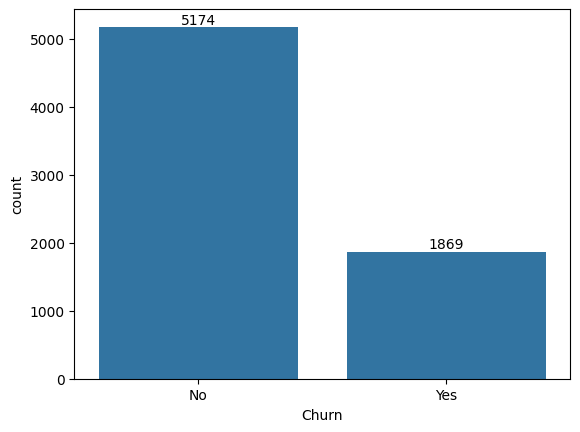

In [9]:
ax=sns.countplot(data,x="Churn")
ax.bar_label(ax.containers[0])
plt.show()

       Churn
Churn       
No      5174
Yes     1869


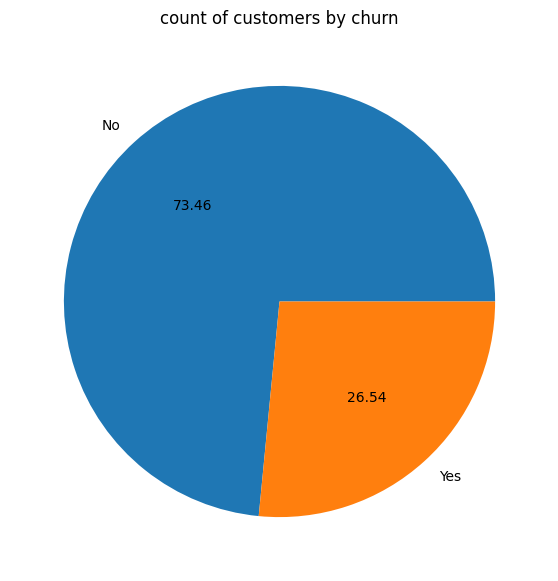

In [10]:
plt.figure(figsize=(7,7))
gb=data.groupby(["Churn"]).agg({"Churn":"count"})
#plt.pie(data["Churn"])
print(gb)
plt.pie(gb["Churn"].values,labels=gb.index,autopct="%.2f")
plt.title("count of customers by churn")
plt.show()

In [87]:
# from the given chart pie we can conclude that 26.54% of our customers have churned out #not lets explore the reason behind it

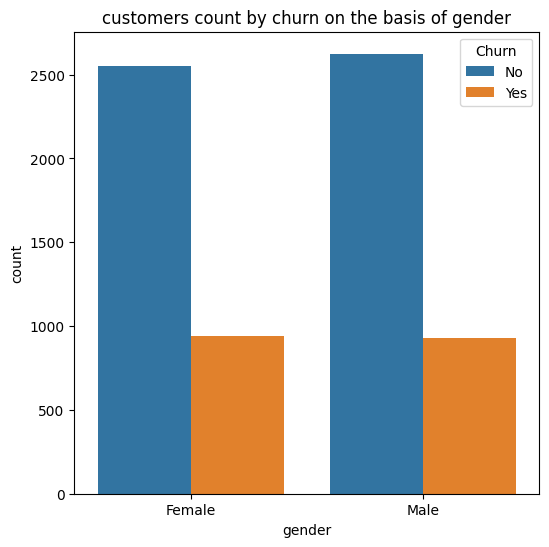

In [14]:
plt.figure(figsize=(6,6))
w=sns.countplot(data,x="gender",hue="Churn")
plt.title("customers count by churn on the basis of gender")
plt.show()

/tmp/ipykernel_38631/2184358616.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(bbox_to_anchor=[1.17,1])


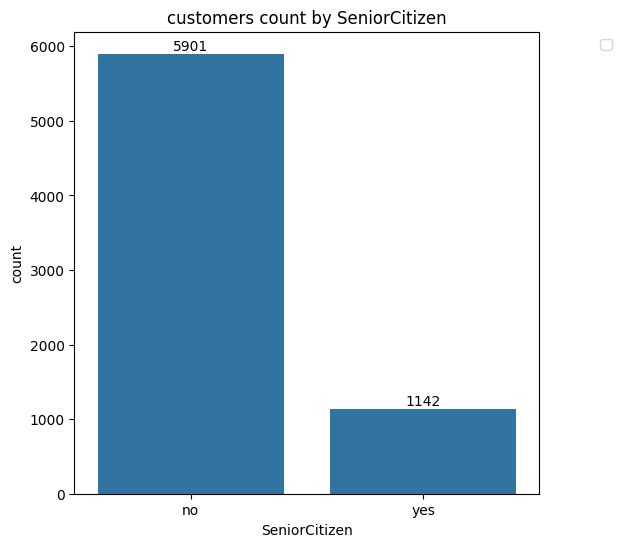

In [17]:
plt.figure(figsize=(6,6))
w=sns.countplot(data,x="SeniorCitizen")
w.bar_label(w.containers[0])
plt.title("customers count by SeniorCitizen")
plt.legend(bbox_to_anchor=[1.17,1])
plt.show()

In [108]:
# comparitive a greated percangae of peopele in senior citizens have churned

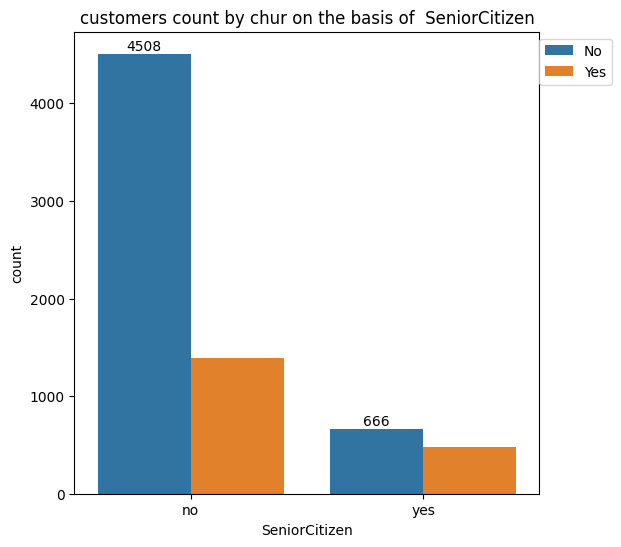

In [18]:
plt.figure(figsize=(6,6))
w=sns.countplot(data,x="SeniorCitizen",hue="Churn")
w.bar_label(w.containers[0])
plt.title("customers count by chur on the basis of  SeniorCitizen")
plt.legend(bbox_to_anchor=[1.17,1])
plt.show()

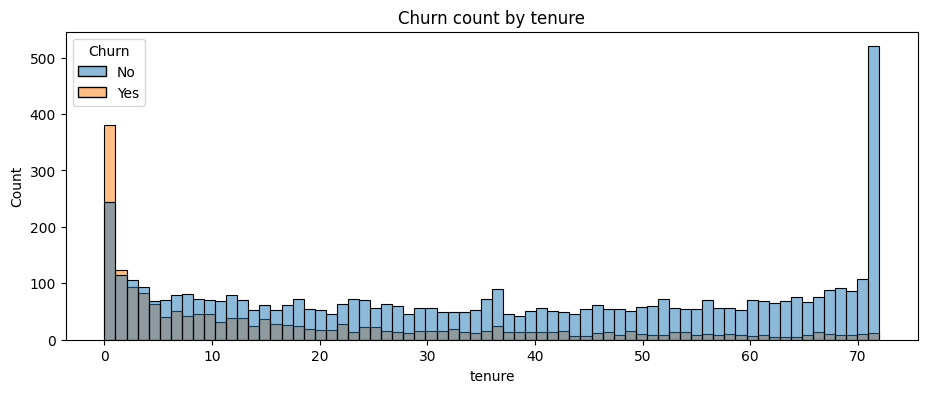

In [55]:
plt.figure(figsize=(11,4))
a1=sns.histplot(data,x="tenure",hue="Churn",bins=70)
#a1.bar_label(a1.containers[0])
plt.title("Churn count by tenure")
plt.show()

In [41]:
# people who have used our services for a long time have stayed and people who used our services for 1 and 2 months have churned out 

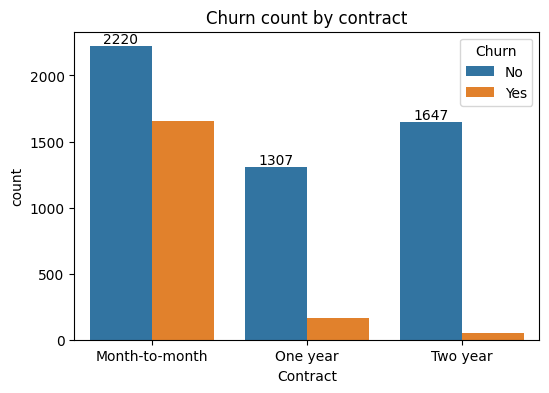

In [59]:
plt.figure(figsize=(6,4))
a1=sns.countplot(data,x="Contract",hue="Churn")
a1.bar_label(a1.containers[0])
plt.title("Churn count by contract")
plt.show()

In [61]:
# people who have month to month contract have likely to churn then people who have 1 or 2 year contract

In [62]:
data.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

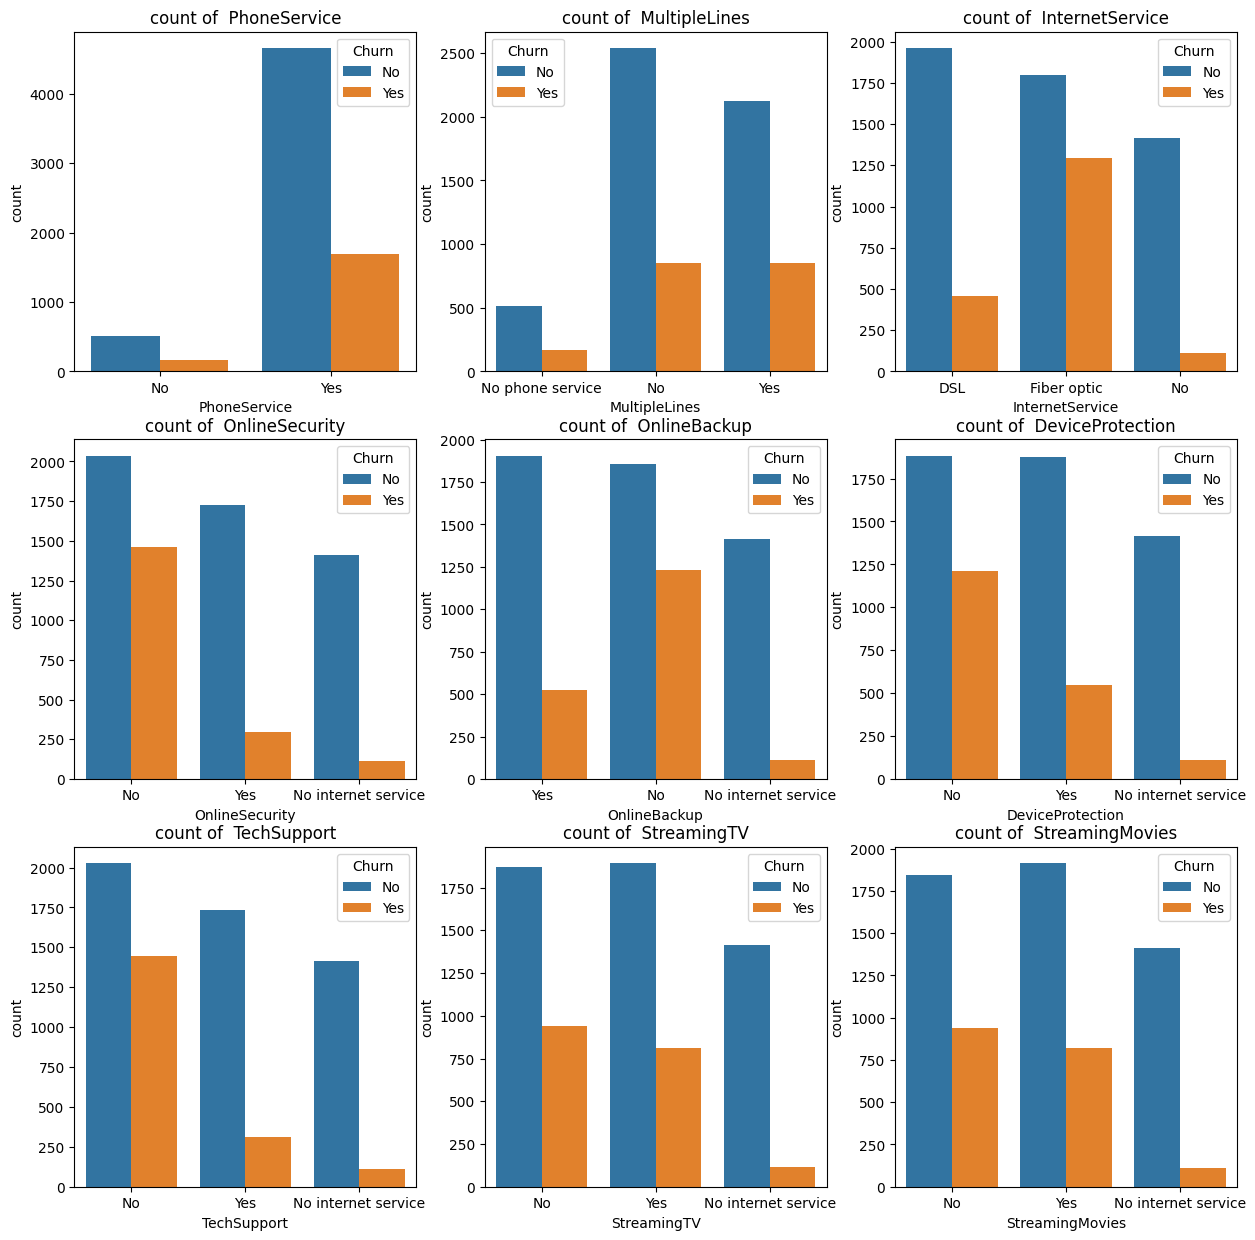

In [141]:
columns=['PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies']
fig,axes=plt.subplots(3,3,figsize=(15,15))
axes=axes.flatten()
for i,col in enumerate(columns):
    #print(i)
    sns.countplot(data,x=col,ax=axes[i],hue="Churn")
    axes[i].set_title(f"count of  {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("count")

In [142]:
# summary

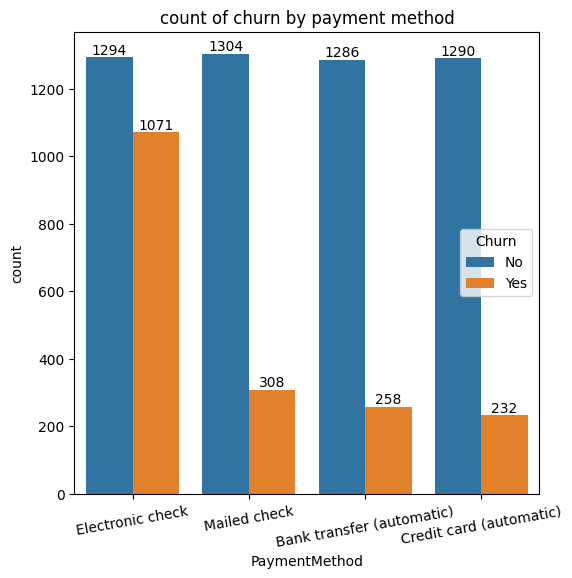

In [156]:
plt.figure(figsize=(6,6))
a2=sns.countplot(data,x="PaymentMethod",hue="Churn")
a2.bar_label(a2.containers[0])
a2.bar_label(a2.containers[1])
plt.xticks(rotation=10)
plt.title("count of churn by payment method")
plt.show()

In [157]:
# customer likely to churn when he is using electornic check as a payment method